[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/unpackAI/BL101/blob/main/course_notebooks/Week_3_DecentralisedFinance%28DeFi%29/03_Decentralised_Finance%28DeFi%29_Coursebook.ipynb)

# 💻 DeFi Coursebook - DIRK

---
# DeFi
---

#### Library Setup
>If you want to run the code cells in this notebook you need to execute the next two cells. It will download our `bl101` from pip and imports it together with some other libaries. *(This might take a few minutes.)*

In [5]:
%%capture [--no-stdout]
# SETUP LIBRARIERS (ONLY ONCE)
%pip install bl101

In [6]:
# Import our library
import bl101
from bl101.helpers import crypto_data

## Intro to DeFi

## DeFi  Application Layer

### Tokens

#### What are tokens?  

Tokens are smart contracts that can represent virtually anything:

- reputation points in an online platform  
- skills of a character in a game  
- lottery tickets  
- financial assets like a share in a company  
- a fiat currency like USD  
- an ounce of gold  
- and more...   

Last week we learnt about token standards. As a quick review: standards are like templates of solidity contracts with predefined methods. A widely used standard for building unique tokens is **ERC-721**. We used it when we built our NFT. 

The 4 most important token standards are:

|  Name | Created | Use Cases |
| -- |-- |-- |
| ERC-20 | 2015 | Fungible token standard that provides basic functionality to transfer tokens, as well as allow tokens to be approved. |
| ERC-721 | 2018 | Non-Fungible Token standard |
| ERC-777 | 2017 | Standard that defines all the functions required to send tokens on behalf of another address, contract or regular account. |
| ERC-1155 | 2018 | A standard for contracts that manage multiple token types. |


Another thing you need to know about tokens is that they are not held by accounts. Tokens exist in contracts, which function like decentralized databases that map tokens to the appropriate Ethereum address. Also, it is the token contract that governs and specifies the rules that apply to a given token. With this, developers set the name, symbol, divisibility and other important token identifiers. 
Hence, the transfer of ownership of tokens only occurs when the current owner sends a request to the contract directing it to allocate part of the balance to another Ethereum wallet address. To register this transfer on the blockchain, the owner must pay a gas fee in ETH.

#### DeFi-related Tokens

In a DeFi context we can define Token standards as a *set of rules that allow the development of cryptocurrency tokens on different blockchain protocols.*   

Contracts of ownership are unique or non-fungible. In the financial world on the other side we need exchangable contracts. Financial instruments are (in most cases) standardized. Think about company stocks, securities, cryptocurrencies or even money. Financial tokens are fungible or interchangeable or even tradeable. In other words: every ERC-20 token usually consists of many tokens. The owner of an ERC-20 (e.g. bitcoin, ether) token is not interested in a specific token rather than how many of these tokens she gets. The **Mona Lisa** would be an ERC721, a **dollar bill** an ERC-20. 

*So what exactly is this ERC-20 standard?*

##### ERC-20
**ERC-20** was introduced in 2015 and provides basic functionality to transfer tokens, as well as allow tokens to be approved so they can be spent by another on-chain third party. All Ethereum wallet addresses are compatible with ERC-20 tokens.

**Example functionalities of ERC-20:**
- transfer tokens from one account to another  
- get the current token balance of an account
- get the total supply of the token available on the network
- approve whether an amount of token from an account can be spent by a third-party account  

**Why make an ERC-20?**  
- Governance token  
- Secure an underlying network  
- create a synthetic asset  
- fund-raising
- etc.

If a Smart Contract implements the following methods and events it can be called an ERC-20 Token Contract and - once deployed - it will be responsible to keep track of the created tokens on Ethereum.

**ERC20 Methods**   
|NAME:|PURPOSE:|INPUT:|TYPE:|RETURNS:|REQUIRED?|
|--|--|--|--|--|--|
| **name** | *returns the name of the token*|- | public view | (string) |🚫|
| **symbol** | *returns the symbol of the token*|- | public view | (string) |🚫|
| **decimals** |*returns the number of decimals the token uses - e.g. 8*| - | public view | (uint8) |🚫|
| **totalSupply** |*returns the total token supply*| - | public view | (uint256) |✅|
| **balanceOf** | *returns the account balance of `_owner`*|`_owner` (address)| public view | `balance` (uint256) |✅|
| **transfer** | *transfer `_value` to `_to` address; MUST fire the transfer event*|`_to` (address), `_value` (uint256)| public | `success` (bool) |✅|
| **transferFrom** | *used for withdraws, allowing contracts to transfer tokens on your behalf*|`_from` (address), `_to` (address), `_value` (uint256)| public | `success` (bool) |✅|
|**approve**| *allows `_spender` to withdraw from your account multiple times, up to the `_value` amount*|`_spender` (address), `_value`(uint256)) |public| `success` (bool)|✅|
| **allowance** |*returns amount which `_spender` is still allowed to withdraw from `_owner`*|_owner (address), _spender (address)| public view | remaining (uint256) |✅|

**ERC20 Events**   
|NAME:|TRIGGERS:|INPUT:|REQUIRED?|
|--|--|--|--|
|**Transfer**|*... when tokens are transferred*| `_from` (address), `_to` (addreess), `_value` (uint256)|✅|
|**Approval**|*... on any successful call of `approve()` method*| `_owner` (address), `_spender`(address), `_value` (uint256)| ✅|   

You don't have to write your ERC-20 token from scratch. Different implementations have been written by various teams that have different trade-offs: from gas saving via pausing token transfers to improved security. You can find examples at [Open Zeppelin](https://docs.openzeppelin.com/contracts/3.x/api/token/erc20). An interesting extension is [ERC20Burnable](https://docs.openzeppelin.com/contracts/3.x/api/token/erc20#ERC20Burnable): this allows token holders to destroy both their own tokens and those that they have an allowance for.

**ETH vs ERC20**  
ETH is the native token of the Ethereum blockchain and it acts as the fuel of the network as each operation on the Ethereum blockchain needs to pay a corresponding amount of **gas**. Gas prices are denoted in small fractions of ether called gwei (1 gwei = 0.000000001 ETH). While ERC20 is the standard to obey in order to create applications (smart contract), the ERC20 token is serving as a currency for accessing the application.

#### Other Token Standards
The complexity of the DeFi ecosystems with many different use cases demands for more token standards to overcome the limitations of ERC-20. However, none of these standards are ... and the field is quickly developing.

**ERC-1363**<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)    
This token standard allows to implement an ERC-20 token that can be used for payments. It's also named **Payable Token**. ERC-1363 allows to execute code after the token was transfered without the need of another transaction and paying gas fees twice. The originator of this token lists these use cases for ERC-1363:
- create a token payable crowdsale  
- selling services for tokens  
- paying invoices  
- making subscriptions  

#### Token vs. Coins  
A crypto **coin** is a crypto asset (crypto asset refers to all kinds of cryptos) that has its own blockchain, as opposed to running on another crypto asset’s blockchain. You could also call a crypto coin a cryptocurrency or a *native token*. Coins are usually used only for payments. Bitcoin, Ethereum, Litecoin are all coins.  

A **token** on the other hand runs on another blockchain. The best known example is the ERC20 token and there exists way more tokens than coins *(remember: we  also called our NFT sometimes a token.)* Tokens have various use cases, including payment but many more.

### Cryptocurrencies

Cryptocurrencies (crpytos) are the encrypted form of a digital currency that does not depend on financial institutions to verify transactions. Cryptos are stored in digital wallets. The term cryptocurrency is the superset, while coins and tokens are two subset categories.

The Top 5 Cryptos by Market Cap *(price x supply)* are:
1. Bitcoin
2. Ethereum
3. Tether
4. USD Coin
5. BNB

Cryptos can be traded on Crypto Exchanges (e.g. [Coinbase](https://coinbase.com), [kraken](https://www.kraken.com)) but more and more traditional brokerage services offer crypto trading, too. Trading with cryptos can be risky and speculative, and the markets can be extremely volatile. However, to get basic and chart information about a specific coin you can go to [coinmarketcap](https://coinmarketcap.com) and click on the coin you are interested it.  

**Different Types Of Cryptos:**
|Type | Main feature	| Examples |
|--|--|--|
|Utility tokens | Meant to provide access to platform service where they reside.	| Funfair, Basic Attention Token, Brickblock, Timicoin, Sirin Labs Token, and Golem.|
|Security tokens | Usage and issuance governed by financial regulation.	| Sia Funds, Bcap (Blockchain Capital), and Science Blockchain.|
|Payment tokens	| Used for paying for goods and services inside and outside their own platforms. Almost every crypto falls in this category. | Monero, Ethereum, and Bitcoin.|
|Exchange tokens | Exchange tokens are native to crypto exchange platforms.	| Binance Coin or BNB token, Gemini USD, FTX Coin for FTX Exchange, OKB for Okex exchange, KuCoin Token, Uni token, HT for Huobi exchange, Shushi, and CRO for Crypto.com.|  
|Meme Coins|Meme coins are inspired by a joke or a silly take on other well-known cryptocurrencies. They typically gain popularity in a short period of time, often hyped online by prominent influencers or investors attempting to exploit short-term gains|Doge Coin, Safemoon|
|Governance tokens | Allow holders certain rights such as voting for changes to protocols or having a say in decisions of a decentralized autonomous organization (DAO) (👉🏻 more in week 4)|luna *(a coin hold by the members of the [Terra network](https://www.terra.money) (another blockchain) to participate in votes about the networks policy - the coin is also traded on on crypto exchanges)*|

#### Bitoin (BTC)   
Bitcoin is the world’s first decentralized cryptocurrency launched in January 2009 by an anonymous computer programmer or group of programmers under the pseudonym “Satoshi Nakamoto.” Each bitcoin is made up of 100 million satoshis (the smallest units of bitcoin), making individual bitcoin divisible up to eight decimal places. That means anyone can purchase a fraction of a bitcoin with as little as one U.S. dollar.  
Bitcoin has generally hovered around 40% of the global cryptocurrency market since May of 2021.

*So what is the difference between Bitcoin and ERC-20?* Both are blockchain-based assets that have value and can be sent and received. The primary difference is that instead of running on their own blockchain, ERC-20 tokens are issued on the Ethereum network. 

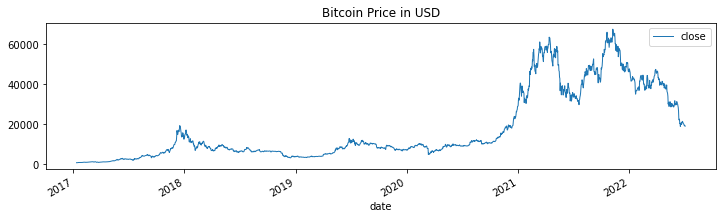

In [7]:
# PLOT BITCOIN PRICE
df = df = crypto_data(coin="BTC", days=2000)
df.plot.line(x="date",y='close',title="Bitcoin Price in USD", figsize=(12,3),lw=1);

#### Ethereum and Ether (ETH)
First proposed in 2013 by Russian-Canadian computer programmer **Vitalik Buterin**, Ethereum was designed to expand the utility of cryptocurrencies by allowing developers to create their own special applications. Unlike traditional apps, Ethereum-based applications are called *decentralized applications*,” or *dapps* for short. Dapps are self-executing thanks to the use of smart contracts.  

As we already know, **smart contracts** are code-based programs that are stored on the Ethereum blockchain and automatically carry out certain functions when predetermined conditions are met. That can be anything from sending a transaction when a certain event takes place or loaning funds once collateral is deposited into a designated wallet.

**What is the difference between Ethereum and Ether?**   
**Ethereum** is a technology that uses blockchain. To cover the cost of this power, you need to pay a fee — and **Ether** is the token by which you make this payment.

You can call it the cryptocurrency of the Ethereum network.

As of March 18, 2022, there are 120 million coins in circulation.

However, the names Ether and Ethereum are often used interchangeably. 

Ethereum is together with bitcoin by far the moste important cryptocurrency - you can see that also from the price chart of Ethereum: it moves similar to that of Bitcoin:

#### Altcoin
Altcoins ("alternative coins") are generally defined as all cryptocurrencies other than Bitcoin (although some people consider *all cryptos beside Bitcoin **and** Ethereum* as Altcoins because most cryptos are forked from one of the two).   
There are tens of thousands of altcoins on the market. In fact the crypto we are going to build in the workbook can be considered as altcoin, too.  
It is possible for an altcoin to fall into more than one category, such as **TerraUSD**, which is a stablecoin **and** utility token.

A typicial use case for the creation of altcoins is to raise funds for specific projects. An initial coin offering (ICO) is the cryptocurrency industry’s equivalent of an initial public offering (IPO). A company looking to raise money to create a new coin, app, or service launches an ICO to raise funds.

For example, the token **Bananacoin** forked from Ethereum in 2017 was a way to raise funds for organic banana plantations in Laos. The project claimed that purchaser of the token become owners of a "...real banana plantation...". However, the project ended after raising $4.8 million, with unpublished project results and 12% of the tokens redeemed.   

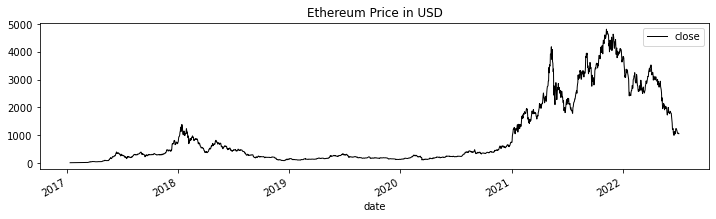

In [8]:
# PLOT ETHEREUM PRICE
df = df = crypto_data(coin="ETH", days=2000)
df.plot.line(x="date",y='close',title="Ethereum Price in USD", figsize=(12,3),lw=1, color="k");

##### Doge Coin   
Do you remember **Doge Coin**? The logo of the coin was created from a viral photo of a Shiba Inu:     

<img src="https://upload.wikimedia.org/wikipedia/en/d/d0/Dogecoin_Logo.png" alt="DOGE Coin Logo" width="100"/>

It is a cryptocurrency forked from Litecon (and therefore it is a token and not a coin) and invented by two software engineers who decided to create a payment system as a *joke*, making fun of the wild speculation in cryptocurrencies at that time. In January 2021, Dogecoin went up over 800% in 24 hours as a result of attention from *Reddit* and Tweets from *Elon Musk*.   
April and May 2021 is sometimes named as the *meme coin season*, with hundreds of these cryptocurrencies posting enormous percentage gains based on pure speculation. Doge Coin was one of them:  

Performance (last 12 month


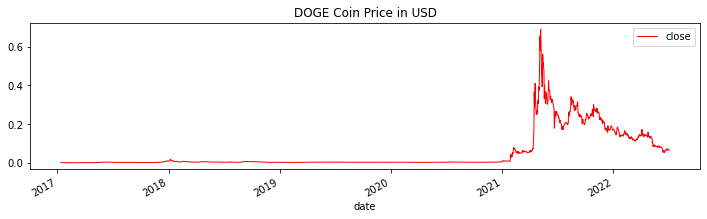

In [9]:
# PLOT DOGE COIN CHART
df = crypto_data(coin="DOGE", days=500)
df.plot.line(x="date",y='close',title="DOGE Coin Price in USD", figsize=(12,3),lw=1, color="r");


##### Stablecoin
Stablecoins are pegged, or tied to another currency (e.g.: US-$), commodity (e.g. gold) or financial instrument. Stablecoins aim to provide an alternative to the high volatility of most cryptos. 
There are three types of stablecoins based on the mechanism used to stabilize their value:  

|Type|Main Feature|Examples|
|--|--|--|
|Fiat-Collateralized|maintain a reserve of a fiat currency (e.g. US-$) or assets (e.g. gold, silver, oil) as collateral assuring the stablecoin's value.|Tether (USDT) and TrueUSD (TUSD) *(both are pary to and backed by US-$ reserves)*|
|Crypto-Collateralized|Backed by other cryptos whereas the amount of reserve-cryptos is bigger than the issued crypto (this makes this coin less volatile than its underlying crypto) |MakerDAO's Dai (DAI)|
|Algorithmic|Trying to keep the stablecoin's value stable by controlling its supply through an algorithm.|TerraUSD (UST) |



As stablecoins are very close to the assets they are bound to, more and more regulation efforts are in place by many countries.


 including Bitcoin (BTC), which has made such investments less suitable for wide use in transactions.

### Oracles

As you might remind in our NFT week when we build our NFT collection with random words we *faked* randomness by hashing a string and using the hash as a pseudo-random number. 
The blockchain per se is deterministic: it cannot create real random numbers. 
The same problem arise when you build financial DAPs: how can you access reliable data from outside the blockchain like current exchange rates, stock prices, etc.
The solution to this are **oracles**.

The word "oracle" originates in Greek mythological stories and refers to those who can communicate directly with god. 

Oracles are platforms that provide information about the real world to the blockchain.

For a smart contract to access e.g. weather, stock prices, political events, etc. an external gateway is required. Oracles serve as a gateway, processing external and deterministic data and converting it to a format that the blockchain can understand.

What is a Blockchain Oracle Problem?
But how can the blockchain verify that the information provided by the oracles are correct? This is called the **Oracle Problem**.

Chainlink as a solution
Chainlink is defined as a decentralized network of oracles that enables smart contracts to interact with data and services outside the blockchain securely. Chainlink connects real-world data to blockchain-based smart contracts.

## Etherium Name Service
*Ethereum addresses* can have names. The Service behind it calls `Ethereum Names Service` (ENS). Every ethereum name ends with **.eth** and like web domains you are registering for a specific time period. You can purchase an ENS [here](https://manager.ens.domains). The current price (as of May 2022) to register an Ethereum address is 0.002 ETH (registration fee) + gas. The estimated gas depends on the name. E.g. for registering **unpackai.eth** the costs would be about US$23 for one year: 

<img src='https://github.com/dirkkalmbach/bl101/blob/main/bl101/images/ENS_for_unpackai.png?raw=true' width=500px>   

The advantage is obvious: instead of a 42 character long wallet address you can chose a *human-readable* name which relates to your organization or project. Let's say you want to start a crowd-funding project: instead of the high risk of mistyping a cryptocurrency wallet address you provide an easy to remember name for your wallet.  

*We will show you in this weeks [workbook](https://colab.research.google.com/github/unpackAI/BL101/blob/main/course_notebooks/Week_3_DecentralisedFinance%28DeFi%29/03_Decentralised_Finance%28DeFi%29_Workbook.ipynb) how to extract the *Ethereum Name* from a wallet address.* 

## Future Developments

### Cryptos as legal tender?  
**China**  
Cryptocurrencies are not a legal tender and cryptocurrency exchanges are illegal in China.
The People’s Bank of China (PBOC) banned financial institutions from handling Bitcoin transactions in 2013 and went further by banning ICOs and domestic cryptocurrency exchanges in 2017. However, the PBOC has been working on introducing an official digital currency (digital Yuan) since 2012. In late 2020, the Chinese government drafted a law that conferred legal status on PBOC’s digital Yuan: the legislation is expected to result in the demise of the fiat currency, and the introduction of currency controls covering exchanges and currency fungibility. 

**El Salvador and CAR**    
A widely discussed field is wether cryptocurrencies can replace conventional currencies (a.k.a. fiat money) or not.
In September 2021, **El Salvador** became the first country in the world to make bitcoin legal tender, and all economic agents were required to accept bitcoin for all payments. The Salvadorean government also launched an app, "Chivo Wallet", which allowed users to digitally trade both bitcoin and dollars, and gave major incentives to download it. In April 2022 **Central African Republic (CAR)** followed El Salvador to approve Bitcoin as legal tender.
Proponents argue that in a country where few people have bank accounts, the adoption of Bitcoin will help encourage savings and offer a safe place to store and transfer money.   
But an estimate from 2020 showed that 9 out of 10 Central Africans do not have access to the internet - a prerequisite for using Bitcoin.

---
# 📚 Reference

**Token Standards**
- crypto.com, (2022). [What are Token Standards? An Overview](https://crypto.com/university/what-are-token-standards) 📄  
- OpenZeppelin. [ERC 20](https://docs.openzeppelin.com/contracts/4.x/erc20) 📄  
- Github [ERC20.sol](https://github.com/OpenZeppelin/openzeppelin-solidity/blob/9b3710465583284b8c4c5d2245749246bb2e0094/contracts/token/ERC20/ERC20.sol) 📄      
- Fabian Vogelsteller & Vitalik Buterin, (2015). [EIP-20: Token Standard](https://eips.ethereum.org/EIPS/eip-20) 📄 
- <sup>[1]</sup> Vittorio Minacori. [ERC-1363 Payable Token](https://vittominacori.github.io/erc1363-payable-token/#abstract) 📄💲 <a name="cite_note-1"></a>[🔙](#cite_ref-1) 


**Oracle Problem**
- Giulio Caldarelli, (2020). [Understanding the Blockchain Oracle Problem: A Call for Action](https://doi.org/10.3390/info11110509) 📄  
- Akash Takyar. [What is Blockchain Oracle Problem and how Chainlin solves it?](https://www.leewayhertz.com/chainlink-solving-blockchain-oracle-problem/) 📄  

**Cryptos**   
- Rakesh Sharma, (2022). [Bananacoin (BCO)](https://www.investopedia.com/terms/b/bananacoin.asp) 📄   

**ENS**   
- Iulia Vasile, (2022). [Ethereum Name Service (ENS): Everything You Need To Know](https://beincrypto.com/learn/ethereum-name-service-ens/) 📄    

**Future Developments**
- Fernando E. Alvarez, David Argente & Diana Van Patten, (2022). [Are Cryptocurrencies Currencies? Bitcoin as Legal Tender in El Salvador](https://www.nber.org/papers/w29968) 📄    
- BBC News, (2022). [Why the Central African Republic adopted Bitcoin](https://www.bbc.com/news/world-africa-61565485) 📄   

**Tutorials**
- Patrick Collins, (2022). [Learn Blockchain, Solidity, and Full Stack Web3 Development with JavaScript, Chapter 13: DeFi & Aave](https://youtu.be/gyMwXuJrbJQ?t=69374) 📺 🏋️‍♂️    
- Patrick Collins, (2021). [Solidity, Blockchain, and Smart Contract Course – Beginner to Expert Python Tutorial, Chapter 10: DeFi & Aave](https://youtu.be/M576WGiDBdQ?t=30880) 📺 🏋️‍♂️    